In [1]:
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
import seaborn as sns
import os
from blast_utils import make_diamond_db, diamond_alignment

import matplotlib as mpl
font = {'size' : 16}
mpl.rc('font', **font)
mpl.rc('lines', linewidth=1.5)
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2

In [129]:
text2EC = pd.read_csv('/disk1/jyang4/repos/CARE/processed_data/text2EC.csv')

In [130]:
text2EC[text2EC['EC number']=='4.2.1.20']['Text'].values[0]

'lyase; carbon-oxygen lyase; hydro-lyase; tryptophan synthase'

In [131]:
text2EC[text2EC['EC number']=='2.6.1.2']

,EC number,Text,Text Incomplete
2355,2.6.1.2,"transferase; transferase, transferring nitroge...",False


In [132]:
text2EC[text2EC['EC number']=='2.6.1.1']['Text'].values

array(['transferase; transferase, transferring nitrogenous groups; transaminase; L-aspartate:2-oxoglutarate aminotransferase'],
      dtype=object)

### Protein Analysis

In [16]:
swissprot = pd.read_csv('../processed_data/protein2EC.csv')
swissprot

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes30,clusterRes50,clusterRes70,clusterRes90,EC3,EC2,EC1
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.-; 3.2.2.6,A1AY86,A0A009IHW8,A0A009IHW8,A0A009IHW8,3.2.2,3.2,3
1,A0A023I7E1,ENG1_RHIMI,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,3.2.1.39,796,3.2.1.39,D4AZ24,A0A023I7E1,A0A023I7E1,A0A023I7E1,3.2.1,3.2,3
2,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,3.1.1.74,A8QPD8,A8QPD8,A8QPD8,A0A024SC78,3.1.1,3.1,3
3,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,3.2.1.91,B2AE04,A1CCN4,A0A024SH76,A0A024SH76,3.2.1,3.2,3
4,A0A044RE18,BLI_ONCVO,MYWQLVRILVLFDCLQKILAIEHDSICIADVDDACPEPSHTVMRLR...,3.4.21.75,693,3.4.21.75,Q9VBC7,A0A044RE18,A0A044RE18,A0A044RE18,3.4.21,3.4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185990,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,4.1.1.76,Q05115,Q05115,Q05115,Q05115,4.1.1,4.1,4
185991,Q6HX62,Y3032_BACAN,MGQNQFRWSNEQLREHVEIIDGTRSPHKLLKNATYLNSYIREWMQA...,3.5.4.2,584,3.5.4.2,Q9KF49,Q6HX62,Q6HX62,Q6HX62,3.5.4,3.5,3
185992,Q6L032,Y1085_PICTO,MLLKNIKISNDYNIFMIIASRKPSLKDIYKIIKVSKFDEPADLIIE...,3.5.4.2,573,3.5.4.2,Q9KF49,Q6L032,Q6L032,Q6L032,3.5.4,3.5,3
185993,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,3.6.1.12,P39262,P39262,Q94MV8,Q94MV8,3.6.1,3.6,3


In [3]:
swissprot[swissprot['EC number'] == '4.2.1.20']['Sequence'][:5].values

array(['MTTLLNPYFGEFGGMYVPQILMPALNQLEEAFVSAQKDPEFQAQFADLLKNYAGRPTALTKCQNITAGTRTTLYLKREDLLHGGAHKTNQVLGQALLAKRMGKSEIIAETGAGQHGVASALASALLGLKCRIYMGAKDVERQSPNVFRMRLMGAEVIPVHSGSATLKDACNEALRDWSGSYETAHYMLGTAAGPHPYPTIVREFQRMIGEETKAQILDKEGRLPDAVIACVGGGSNAIGMFADFINDTSVGLIGVEPGGHGIETGEHGAPLKHGRVGIYFGMKAPMMQTADGQIEESYSISAGLDFPSVGPQHAYLNSIGRADYVSITDDEALEAFKTLCRHEGIIPALESSHALAHALKMMREQPEKEQLLVVNLSGRGDKDIFTVHDILKARGEI',
       'MTTLLNPYFGEFGGMYVPQILMPALRQLEEAFVSAQKDPEFQAQFNDLLKNYAGRPTALTKCQNITAGTNTTLYLKREDLLHGGAHKTNQVLGQALLAKRMGKTEIIAETGAGQHGVASALASALLGLKCRIYMGAKDVERQSPNVFRMRLMGAEVIPVHSGSATLKDACNEALRDWSGSYETAHYMLGTAAGPHPYPTIVREFQRMIGEETKAQILEREGRLPDAVIACVGGGSNAIGMFADFINETNVGLIGVEPGGHGIETGEHGAPLKHGRVGIYFGMKAPMMQTEDGQIEESYSISAGLDFPSVGPQHAYLNSTGRADYVSITDDEALEAFKTLCLHEGIIPALESSHALAHALKMMRENPDKEQLLVVNLSGRGDKDIFTVHDILKARGEI',
       'MAASGTSATFRASVSSAPSSSSQLTHLKSPFKAVKYTPLPSSRSKSSSFSVSCTIAKDPPVLMAAGSDPALWQRPDSFGRFGKFGGKYVPETLMHALSELESAFYALATDDDFQRELAGILKDYVGRESPLYFAERLTEHYRRENGEGPLIYLKREDLNHTGAHKINNAVAQALLA

In [4]:
swissprot[swissprot['EC number'] == '2.6.1.1']['Sequence'][:5].values

array(['MAATTTTSSSSRIAYSRHNIPGLHSDSLNPKSISFSSNLHTFSLKSSGSRRQLYSRRTGAVVIMQSMDKVEVDISLSPRVNSVKPSKTVAITDQATALVQAGVPVIRLAAGEPDFDTPAPIVEAGINAIREGHTRYTPNAGTMELRSAISHKLKEENGLSYTPDQILVSNGAKQSIIQAVLAVCSPGDEVLIPAPYWVSYPEMARLADATPVILPTSISEDFLLDPKLLESKLTEKSRLLILCSPSNPTGSVYPRKLLEQIAEIVARHPRLLVISDEIYEHIIYAPATHTSFASLPGMWDRTLTVNGFSKAFAMTGWRLGYIAGPKHFIAACNKIQSQFTSGASSISQKAAVAALGLGYAGGELVATMVKSFRERRDYLVKSFGEIEGVKISEPRGAFYLFIDLSSYYGVEVDGFGSINNSESLCRYLLDKAQVALVPGDAFGDDTCIRISYAASLSTLQAAVERIKKALVTIKPPVPV',
       'MFQKVDAYAGDPILSLMERFKEDPRSDKVNLSIGLYYNDDGIIPQLQAVAEAEARLNAEPHGASLYLPMEGFSGYRQAIAPLLFGAEHTALKQNRIASIQTVGGSGALKVGADFLKRYFPESHVWVSDPTWENHIAIFEGAGFEVSTYPWFDKATNGVRFENLLAMLQTLPARDIVLLHPCCHNPTGADLTPAQWDRVVEVLKARQLIPFLDIAYQGFGGGLEEDAYAIRAIASAGMPMLVSNSFSKIFSLYGERVGGLSVVCEDSETAGRVLGQLKATVRRNYSSPPSFGAQVVATVLNDAALKATWQAEVDAMRAHILTMRQALVDALQQVAPGSKVDYLLKQRGMFSYTGFSAAQVDRLRDEFGVYLIASGRMRVAGLNSRNVQQVAKAFVAVM',
       'MAPPSVFAEVPQAQPVLVFKLIADFREDPDPRKVNLGVGAYRTDDCQPWVLPVVRKVEQRIANDSSLNHEYLPILGLAEFRTCASRLALGDDSP

In [5]:
swissprot['Sequence'].nunique()

160223

In [6]:
swissprot['EC number'].nunique()

4673

### Reaction Analysis

In [17]:
reaction2EC = pd.read_csv('/disk1/jyang4/repos/CARE/processed_data/reaction2EC.csv')
reaction2EC

,Reaction,Mapped Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
2,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
4,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
...,...,...,...,...
61761,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...,NaN,7.6.2.8,NaN
61762,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@H]([C@H]...,NaN,7.6.2.8,NaN
61763,C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...,NaN,7.6.2.9,NaN
61764,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,NaN,7.6.2.9,NaN


In [10]:
reaction2EC['Reaction'].nunique()

46586

In [11]:
reaction2EC['EC number'].nunique()

4673

### Look at the distributions

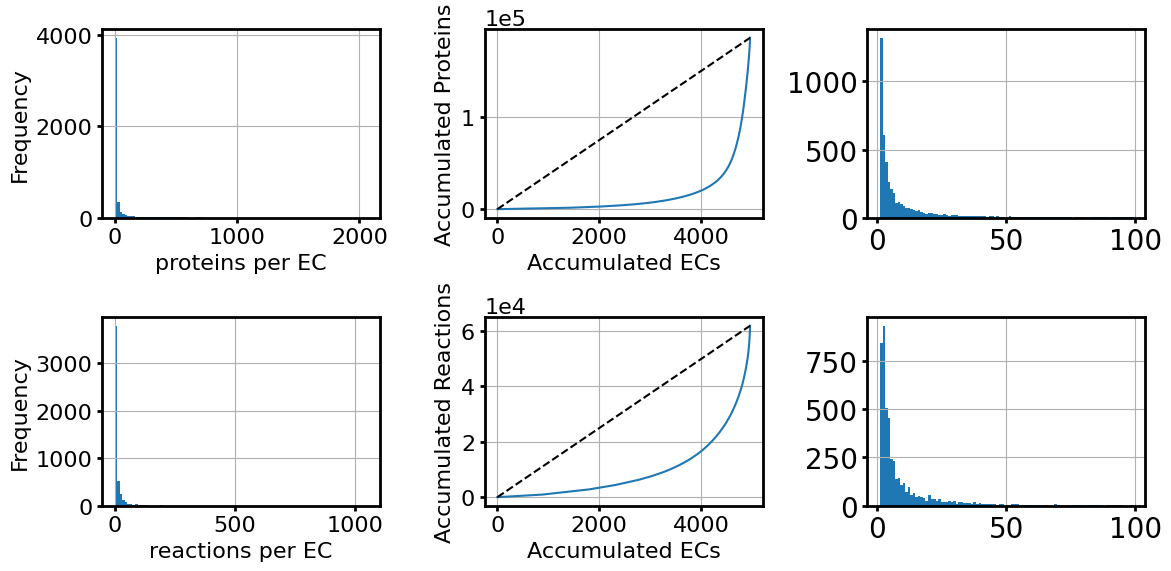

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(2,3, 1)
swissprot['EC number'].value_counts().hist(bins = 100)
plt.xlabel('proteins per EC')
plt.ylabel('Frequency')
#plt.legend(['ECreact', 'EnzymeMap'])

plt.subplot(2,3, 3)
subset = swissprot[swissprot['EC number'].map(swissprot['EC number'].value_counts()) < 100]
subset['EC number'].value_counts().hist(bins = 100)
#plt.xlabel('proteins per EC')
#set xlabel font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.legend(['ECreact', 'EnzymeMap'])

plt.subplot(2, 3, 2)
np.random.seed(42)
swissprot_grouped = swissprot.groupby('EC number', as_index=False).apply(lambda x: x.sample(1))
swissprot_grouped['counts'] = swissprot_grouped['EC number'].map(swissprot['EC number'].value_counts())
plt.plot(swissprot_grouped.sort_values('counts', ascending=True).reset_index()['counts'].cumsum().values)
plt.plot([0, len(swissprot_grouped)], [0, len(swissprot)], 'k--')
plt.grid()
#use scientific notaiton for the y axis
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Accumulated Proteins')
plt.xlabel('Accumulated ECs')

plt.subplot(2,3, 4)
reaction2EC['EC number'].value_counts().hist(bins = 100)
plt.xlabel('reactions per EC')
plt.ylabel('Frequency')
#plt.legend(['ECreact', 'EnzymeMap'])

plt.subplot(2,3, 6)
subset = reaction2EC[reaction2EC['EC number'].map(reaction2EC['EC number'].value_counts()) < 100]
subset['EC number'].value_counts().hist(bins = 100)
#plt.xlabel('reactions per EC')
#plt.legend(['ECreact', 'EnzymeMap'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(2, 3, 5)
np.random.seed(42)
reaction2EC_grouped = reaction2EC.groupby('EC number', as_index=False).apply(lambda x: x.sample(1))
reaction2EC_grouped['counts'] = reaction2EC_grouped['EC number'].map(reaction2EC['EC number'].value_counts())
plt.plot(reaction2EC_grouped.sort_values('counts', ascending=True).reset_index()['counts'].cumsum().values)
plt.plot([0, len(reaction2EC_grouped)], [0, len(reaction2EC)], 'k--')
plt.grid()
#use scientific notaiton for the y axis
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylabel('Accumulated Reactions')
plt.xlabel('Accumulated ECs')

plt.tight_layout()
plt.savefig('figs/distribtuion.png', dpi=500)
plt.savefig('figs/distribtuion.svg')

### Visualize a few reactions for tryptophane synthase

In [7]:
subset = reaction2EC[reaction2EC['EC number'] == '2.6.1.1']
from rdkit.Chem import Draw
for index in [1, 2, 24]:
    rxn = AllChem.ReactionFromSmarts(subset['Reaction'].values[index], useSmiles=True)
    d2d = Draw.MolDraw2DCairo(700,300)
    d2d.DrawReaction(rxn)
    png = d2d.GetDrawingText()
    open('figs/transaminase{}.png'.format(index),'wb+').write(png) 

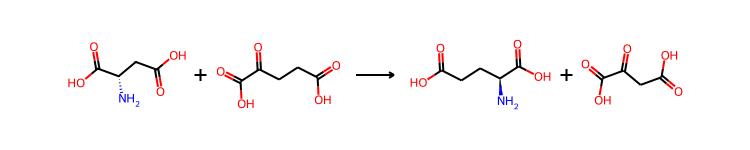

In [8]:
AllChem.ReactionFromSmarts(subset['Reaction'].values[1], useSmiles=True)

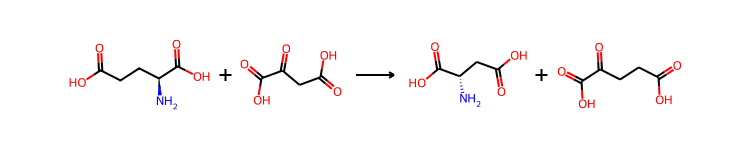

In [9]:
AllChem.ReactionFromSmarts(subset['Reaction'].values[2], useSmiles=True)

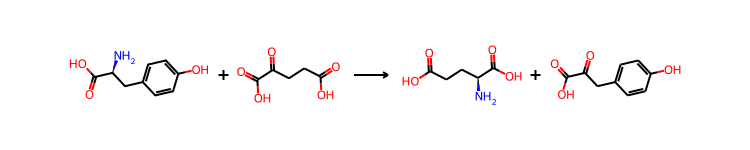

In [10]:
AllChem.ReactionFromSmarts(subset['Reaction'].values[24], useSmiles=True)

In [11]:
TrpB = reaction2EC[reaction2EC['EC number'] == '4.2.1.20']
TrpB.head()

,Reaction,Mapped Reaction,EC number,Reaction Text
53747,Fc1cccc2cc[nH]c12.N[C@@H](CO)C(=O)O>>N[C@@H](C...,[F:1][c:2]1[cH:3][cH:4][cH:5][c:6]2[cH:7][cH:8...,4.2.1.20,L-serine + 7-fluoroindole = 7-fluorotryptophan...
53748,C[C@@H](O)[C@H](N)C(=O)O.Cc1cc2ccccc2[nH]1>>Cc...,[CH3:1][C@@H:2]([OH:3])[C@H:4]([NH2:5])[C:6](=...,4.2.1.20,"L-threonine + 2-methylindole = 2-methyl-(2S,3S..."
53749,N[C@@H](COP(=O)(O)O)C(=O)O.c1ccc2[nH]ccc2c1>>N...,[NH2:1][C@@H:2]([CH2:3][O:4][P:5](=[O:6])([OH:...,4.2.1.20,O-phospho-L-serine + indole = L-tryptophan + p...
53750,Fc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>N[C@@H](C...,[F:1][c:2]1[cH:3][cH:4][c:5]2[nH:6][cH:7][cH:8...,4.2.1.20,L-serine + 5-fluoroindole = 5-fluorotryptophan...
53751,N#Cc1ccc2[nH]ccc2c1.N[C@@H](CO)C(=O)O>>N#Cc1cc...,[N:1]#[C:2][c:3]1[cH:4][cH:5][c:6]2[nH:7][cH:8...,4.2.1.20,L-serine + 5-cyanoindole = 5-cyano-L-tryptopha...


In [12]:
#save reaction to jpg
from rdkit.Chem import Draw
for index in [0, 8, 48, 52]:
    rxn = AllChem.ReactionFromSmarts(TrpB['Reaction'].values[index], useSmiles=True)
    d2d = Draw.MolDraw2DCairo(500,250)
    d2d.DrawReaction(rxn)
    png = d2d.GetDrawingText()
    open('figs/TrpB{}.png'.format(index),'wb+').write(png) 

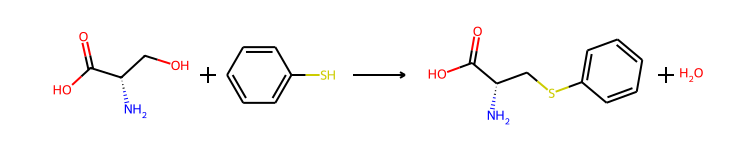

In [13]:
AllChem.ReactionFromSmarts(TrpB['Reaction'].values[8], useSmiles=True)

### Anlayze the test splits

In [23]:
#load everything
protein2EC = pd.read_csv('../processed_data/protein2EC.csv')
reaction2EC = pd.read_csv('../processed_data/reaction2EC.csv')

price = pd.read_csv('../splits/task1/price_protein_test.csv')
promiscuous = pd.read_csv('../splits/task1/promiscuous_protein_test.csv')
isolated30 = pd.read_csv('../splits/task1/30_protein_test.csv')
isolated50 = pd.read_csv('../splits/task1/30-50_protein_test.csv')

easy = pd.read_csv('../splits/task2/easy_reaction_test.csv')
medium = pd.read_csv('../splits/task2/medium_reaction_test.csv')
hard = pd.read_csv('../splits/task2/hard_reaction_test.csv')

In [24]:
price

,Entry,EC number,Sequence,Length
0,WP_063460136,5.3.1.7,MAIPPYPDFRSAAFLRQHLRATMAFYDPVATDASGGQFHFFLDDGT...,424
1,WP_063462980,4.2.1.43,VPTTFHEDGTLDLDSQKRCLDFMIDAGVDGVCILANFSEQFSLSDA...,294
2,WP_063462990,1.1.1.48,LIDCNIDMTQLFAPSSSSTDATGAPQGLAKFPSLQGRAVFVTGGGS...,280
3,WP_041412631,4.2.1.25,MCLGRRRCHMNNKKPKTLRSASWFGSDDKNGFMYRSWMKNQGIPEH...,586
4,WP_011717048,5.1.3.3,MQLSVTQKSLQHAAFADELQLVTLTNSHGLEVVLSNYGASIWSVKL...,351
...,...,...,...,...
143,WP_010207013,1.3.8.7,MADYKAPLRDMRFVLNEVFEVATTWAQLPALADTVDAETVEAILEE...,592
144,WP_010207016,1.3.8.7,MPDYKAPLRDIRFVRDELLGYEAHYQSLPACQDATPDMVDAILEEG...,601
145,WP_010207340,2.6.1.19,MSSNNPQTREWQALSSDHHLAPFSDFKQLKEKGPRIITKAHGVYLW...,454
146,WP_010207341,6.3.1.11,MSVPPRAVQLNEANAFLKDHPEVLYVDLLIADMNGVVRGKRIERTS...,458


In [25]:
promiscuous

,index,Entry,Sequence,EC number,Surprise Level,Number of ECs,Duplicated EC,Duplicated Sequence,Subunit
0,4907,Q09851,MEAEKFVLITGCSEGGIGNALALKFHQEGFQVLATARQVERMDNLT...,1.1.1.101;3.1.1.3,4,2,True,False,NaN
1,8878,Q95JH7,MDSKHQCVKLNDGHFMPVLGFGTYAPAEVPKNKALEATKLAIEAGF...,1.1.1.112;1.1.1.149;1.1.1.209;1.1.1.210;1.1.1....,3,9,True,False,SUBUNIT: Monomer. {ECO:0000250|UniProtKB:Q04828}.
2,3912,P22071,MPGWSCLVTGAGGFVGQRIIRMLVQEKELQEVRALDKVFRPETKEE...,1.1.1.145;1.1.1.210;1.1.1.270;5.3.3.1,4,4,True,False,NaN
3,9579,Q9XWF0,MSIKRLSMRLKKGIHRSWNRMTSLEAGLEEEKEIKIVEEPEPRPWK...,1.1.1.145;5.3.3.1,4,2,True,False,NaN
4,7122,Q642M9,MALRWGICSAGKISHDFTVALRTLPAEQHQVVAVAARELAHAQEFA...,1.1.1.179;1.3.1.20,3,2,True,False,SUBUNIT: Homodimer. {ECO:0000250}.
...,...,...,...,...,...,...,...,...,...
204,7216,Q68G84,MGFAVESRSHVKDILGLINAFNEVKKITVDGTTPITVAHVAALARR...,4.3.1.24;5.4.3.10,4,2,True,False,SUBUNIT: Homodimer (PubMed:15878763). Homotetr...
205,3287,O55052,MPMFIVNTNVPRSSVPEGLLSELTQQLAQATGKPAQYIAVHVVPDQ...,5.3.2.1;5.3.3.12,2,2,True,False,SUBUNIT: Homotrimer (By similarity). Interacts...
206,8653,Q8XBV3,MSIPFTRWPEEFARRYREKGYWQDLPLTDILTRHAASDSIAVIDGE...,6.2.1.71;6.3.2.14,3,2,True,False,"SUBUNIT: Proteins EntB, EntD, EntE, and EntF f..."
207,7182,Q66HZ2,MCSRVWFITDRRISQEYPQIQILRALKERCVEDDVEFRYLLMDEIV...,6.3.1.17;6.3.2.41,2,2,True,False,NaN


In [26]:
isolated30

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes30,clusterRes50,clusterRes70,clusterRes90,EC3,EC2,EC1
0,O32178,FADN_BACSU,MHKHIRKAAVLGSGVMGSGIAAHLANIGIPVLLLDIVPNDLTKEEE...,1.1.1.35,789,1.1.1.35,O32178,O32178,O32178,O32178,1.1.1,1.1,1
1,P40580,BZRD_YEAST,MGKVILITGASRGIGLQLVKTVIEEDDECIVYGVARTEAGLQSLQR...,1.1.1.320,263,1.1.1.320,P40580,P40580,P40580,P40580,1.1.1,1.1,1
2,P05707,SRLD_ECOLI,MNQVAVVIGGGQTLGAFLCHGLAAEGYRVAVVDIQSDKAANVAQEI...,1.1.1.140,259,1.1.1.140,P05707,P05707,P05707,P05707,1.1.1,1.1,1
3,P29898,DHM2_PARDE,MKRILTLTVAALALGTPALAYDGTNCKAPGNCWEPKPDYPAKVEGS...,1.1.2.7,103,1.1.2.7,P29898,P29898,P29898,P29898,1.1.2,1.1,1
4,A0A075HNX4,LCAO_UNCAR,MAQGAQRKNFGHNQILRPSAAYTPVDEQEVLQILDRHRGQRIRAVG...,1.1.3.20,479,1.1.3.20,A0A075HNX4,A0A075HNX4,A0A075HNX4,A0A075HNX4,1.1.3,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Q5WCL2,TAGH_SHOC1,MNPKMILTGVSKKYTLYRNNTEKLKAMFFPKTREQHRDFYALKDIN...,7.5.2.4,360,7.5.2.4,Q5WCL2,Q5WCL2,Q5WCL2,Q5WCL2,7.5.2,7.5,7
428,Q3JSI8,RBSA1_BURP1,MRASLENGDDHDAHRLVDAGFRPPGRPRAARRRAFARARRGERRAR...,7.5.2.7,859,7.5.2.7,Q3JSI8,Q3JSI8,Q3JSI8,Q3JSI8,7.5.2,7.5,7
429,O21280,CCMA_RECAM,MNLTKIQNLTIHNITGIRSNKIIFQNINFSLEKGSLFIIQGSNGSG...,7.6.2.5,222,7.6.2.5,O21280,O21280,O21280,O21280,7.6.2,7.6,7
430,B0R5G4,BTUDA_HALS3,MTLDVTGLDVELAGTRILDDVHASIRDGHLVGVVGPNGAGKSTLLR...,7.6.2.8,398,7.6.2.8,B0R5G4,B0R5G4,B0R5G4,B0R5G4,7.6.2,7.6,7


In [27]:
isolated50

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes30,clusterRes50,clusterRes70,clusterRes90,EC3,EC2,EC1
0,Q0KBD2,DEND_CUPNH,MNVLITGGAGFLGLQLARLLLQRGTLNLDGQPVAIKRLTLLDVVAP...,1.1.1.410,324,1.1.1.410,P44094,Q0KBD2,Q0KBD2,Q0KBD2,1.1.1,1.1,1
1,D4GYH5,AGLM_HALVD,MELSIIGSGYVGTTIAACFAELGHDVVNVDIDEDIVASLNDGQAPI...,1.1.1.22,430,1.1.1.22,O34862,D4GYH5,D4GYH5,D4GYH5,1.1.1,1.1,1
2,P9WQC7,ADHB_MYCTU,MKTKGALIWEFNQPWSVEEIEIGDPRKDEVKIQMEAAGMCRSDHHL...,1.1.1.1,375,1.1.1.1,P80094,P9WQC7,P9WQC7,P9WQC7,1.1.1,1.1,1
3,Q94AX4,DLD_ARATH,MAFASKFARSKTILSFLRPCRQLHSTPKSTGDVTVLSPVKGRRRLP...,1.1.2.4,567,1.1.2.4,Q12627,Q94AX4,Q94AX4,Q94AX4,1.1.2,1.1,1
4,B8MKR3,CYB2_TALSN,MARVLDAAEVAKHNTPESCWVILYGKVYDVTEFISSHPGGVKVILR...,1.1.2.3,496,1.1.2.3,B8MKR3,B8MKR3,B8MKR3,B8MKR3,1.1.2,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Q9WXX0,RBSA1_THEMA,MFPLLAFRGDRMEILKAKGIVKRFPGVVAVDNVDFEVYENEIVSLI...,7.5.2.7,520,7.5.2.7,A4WER4,Q9WXX0,Q9WXX0,Q9WXX0,7.5.2,7.5,7
556,Q831L8,TAGH_ENTFA,MEKELKVRTKLLTKEYSLAQTRIDKLKTLFSVFQNKVPTFWALKGV...,7.5.2.4,447,7.5.2.4,Q03SI5,Q831L8,Q831L8,Q831L8,7.5.2,7.5,7
557,Q9C8T1,AB1I_ARATH,MSIRRPQIPRLLLQNVSCMRNAQQILRHVNVSLHDGGALVLTGTNG...,7.6.2.5,229,7.6.2.5,Q2G9A9,Q9C8T1,Q9C8T1,Q9C8T1,7.6.2,7.6,7
558,Q0A808,CCMA_ALKEH,MGDTALHLVAAPALEATGLQVARGGRPLFRGLGFRLARGGLLCVRG...,7.6.2.5,236,7.6.2.5,Q2G9A9,Q0A808,Q0A808,Q0A808,7.6.2,7.6,7


In [28]:
reaction_list = ['reaction2EC', 'Easy', 'Medium', 'Hard']
reaction_df_list = [reaction2EC, easy, medium, hard]

protein_list = ['EC Level 4', 'protein2EC', 'Price', 'Promiscuous', '<30%', '30-50%']
protein_df_list = [protein2EC.drop_duplicates(subset='EC number'), protein2EC, price, promiscuous, isolated30, isolated50]

# Run BLAST to check sequence identites

In [11]:
os.makedirs('../task1_baselines/BLAST/ref_databases/', exist_ok=True)
#make diamond reference database for BLAST
make_diamond_db('../splits/task1/fastas/train_swissprot.fasta', '../task1_baselines/BLAST/ref_databases/train_swissprot') 

diamond v2.1.9.163 (C) Max Planck Society for the Advancement of Science, Benjamin Buchfink, University of Tuebingen
Documentation, support and updates available at http://www.diamondsearch.org
Please cite: http://dx.doi.org/10.1038/s41592-021-01101-x Nature Methods (2021)

#CPU threads: 384
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database input file: fastas/train_swissprot.fasta
Opening the database file...  [0.015s]
Loading sequences...  [0.211s]
Masking sequences...  [0.074s]
Writing sequences...  [0.067s]
Hashing sequences...  [0.019s]
Loading sequences...  [0s]
Writing trailer...  [0.003s]
Closing the input file...  [0s]
Closing the database file...  [0.015s]

Database sequences  183643
  Database letters  72347043
     Database hash  c5dfb2a7c029f72a3d4bf9c88c0c5a9d
        Total time  0.407000s


In [8]:
import npysearch as npy

title_list = ['previously misclassified', 'promiscuous', '<30%', '30-50%']
fasta_list = ['price_protein_test.fasta', 'promiscuous_protein_test.fasta', '30_protein_test.fasta', '30-50_protein_test.fasta']

def get_histograms(title_list, fasta_list):

    all_results = pd.DataFrame()
    #plt.subplots(2, 3, figsize=(10, 6))
    for title, fasta in zip(title_list, fasta_list):
        #plt.subplot(2, 3, i+1)
        results = diamond_alignment(f'../splits/task1/fastas/{fasta}', '../task1_baselines/BLAST/ref_databases/train_swissprot')
        #results_prot = npy.blast(query=f'fastas/{fasta_list[i]}',
                                #  database=f'fastas/train_swissprot.fasta',
                                #  minIdentity=0,
                                #  maxAccepts=1,
                                #  alphabet="protein")
        #results = pd.DataFrame(results_prot)  # Convert this into a dataframe so that we can see it more easily
        results['Split'] = title
        #add the indices of the missing proteins


        all_results = pd.concat([all_results, results])
        
    return all_results

all_results = get_histograms(title_list, fasta_list)

In [9]:
all_results['max_id'] = all_results['max_id']/100

In [10]:
#add filler rows with max_id set to 0 for each Split until it reaches the full length
total_lengths = {"<30%": 432, "30-50%": 560, "previously misclassified": 148, "promiscuous": 209}
#total_lengths = [584, 560, 432, 148] #make sure this is the right order as the sorted value_counts

for split, count in all_results['Split'].value_counts().items():
    total_count = total_lengths[split]
    for i in range(0, total_count - count):
        all_results.loc[len(all_results)] = {'max_id': 0, 'Split': split}
        #add a row to the dataframe

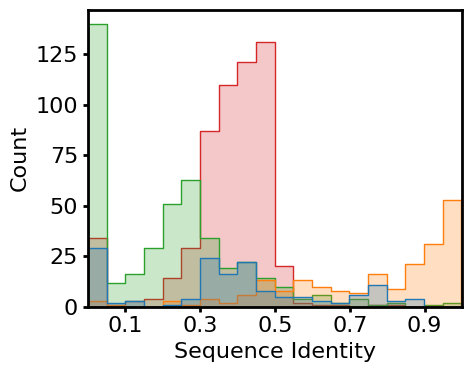

In [15]:
plt.figure(figsize=(5, 4))
#sns.histplot(all_results, x="max_id", hue="Split", element="step",stat="count", bins=20, fill=True)
sns.histplot(all_results, x="max_id", hue="Split", element="step",stat="count", bins=20, fill=True, legend=False)
plt.xlim(0, 1)
#plt.xlim(1, 2)
plt.xticks(np.arange(0.1, 1.1, 0.2))
plt.xlabel('Sequence Identity')
plt.tight_layout()
plt.savefig('figs/task1_similiarty_histogram.png', dpi=500)
#plt.savefig('figs/task1_similiarty_histogram.svg')
# plt.hist(results['Identity'], histtype='step', fill=False, label=title_list[i], bins=20, density=True, stacked=True)
#         #plt.title(title_list[i])

In [31]:
def make_pie_charts(title_list, df_list):

    fig, axs = plt.subplots(2, 4, figsize=(14, 6))

    for index, (title, test_df) in enumerate(zip(title_list, df_list)):

        df = pd.DataFrame()
        if title == 'Promiscuous':
            new = test_df.copy()
            new['EC number'] = new['EC number'].apply(lambda x: x.split(';')) 
            new = new.explode('EC number')
            df['EC'] = new['EC number']

        df['EC'] = test_df['EC number']

        df['EC1'] = df['EC'].str.split('.').str[0]
        df['EC2'] = df['EC'].str.split('.').str[:2].str.join('.')

        distribution = [list(df[df['EC1'] == ec]['EC2'].value_counts().values) for ec in np.sort(df['EC1'].unique())]
        level2_labels = [list(df[df['EC1'] == ec]['EC2'].value_counts().keys()) for ec in np.sort(df['EC1'].unique())]

        #concatenate zeros so that each list is the same length
        max_len = max([len(l) for l in distribution])
        for i, l in enumerate(distribution):
            distribution[i] = l + [0] * (max_len - len(l))
            level2_labels[i] = level2_labels[i] + [''] * (max_len - len(level2_labels[i]))
        #distribution

        sum = np.sum(np.sum(distribution))
        #replace level2 labels with an empty string if the corresponding entry in distribution is too small
        for i, l in enumerate(distribution):
            for j, count in enumerate(l):
                if count/sum < 0.05:
                    level2_labels[i][j] = ''


        size = 0.3
        #vals = np.array([[1000., 32.], [37., 40.], [29., 10.]])
        vals = np.array(distribution)
        i = index // 4 
        j = index % 4

        #cmap = plt.colormaps["tab10"]
        #outer_colors = cmap(np.arange(vals.shape[0])*3.7)
        #inner_colors = cmap(np.arange(vals.shape[0]*vals.shape[1]))

        mylabels = np.arange(1, vals.shape[0]+1)

        outer_colors = sns.color_palette("tab10", vals.shape[0])
        axs[i, j].pie(vals.sum(axis=1), radius=1, colors=outer_colors,
            wedgeprops=dict(width=size, edgecolor='w'), labels=mylabels)
        #repeat the outer colors as the inner colors
        inner_colors = []
        for k in range(vals.shape[0]):
            inner_colors = inner_colors + [outer_colors[k]] * vals.shape[1]

        
        # axs[i, j].pie(vals.flatten(), radius=1-size, colors=inner_colors,
        #     wedgeprops=dict(width=size, edgecolor='w'), labels=np.array(level2_labels).flatten(), labeldistance=0.65, )
        #don't include level 2 labels for now
        axs[i, j].pie(vals.flatten(), radius=1-size, colors=inner_colors,
            wedgeprops=dict(width=size, edgecolor='w'))

        axs[i, j].set(aspect="equal", title=title)
    plt.savefig('figs/pie_charts_task2.png', dpi=500)
    plt.show()

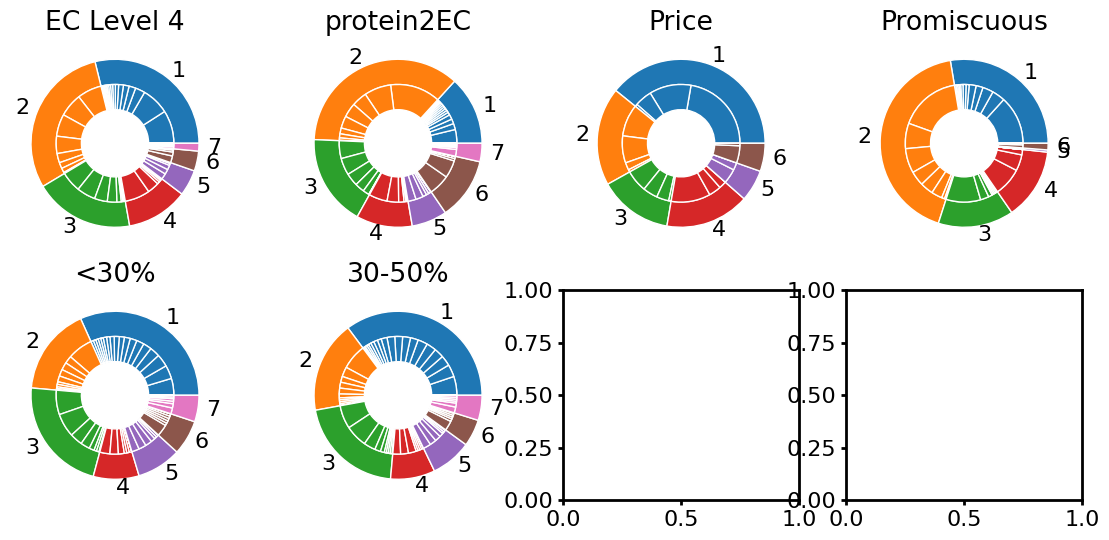

In [30]:
make_pie_charts(protein_list, protein_df_list)

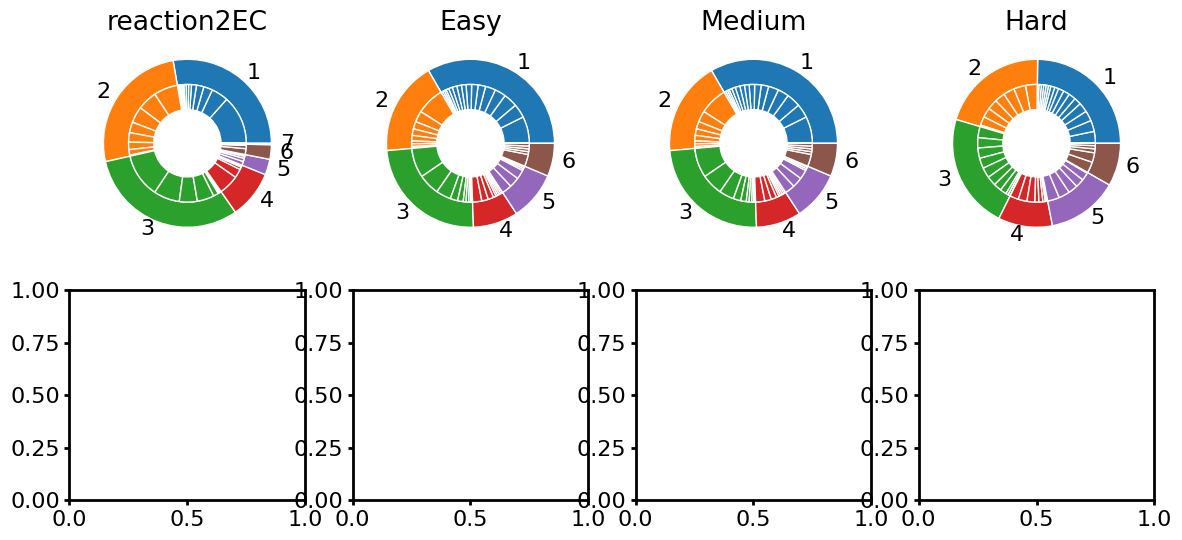

In [32]:
make_pie_charts(reaction_list, reaction_df_list)